In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)



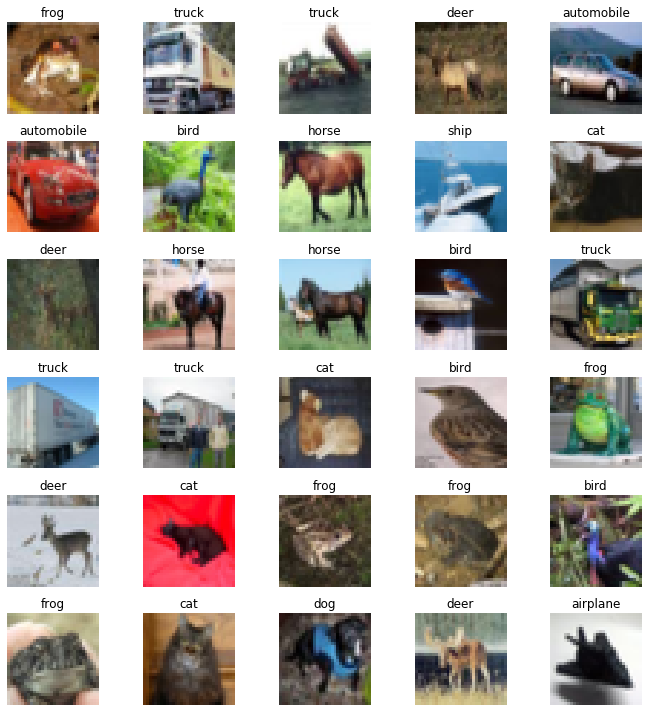

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def plotImages(sample_data):
    img, label = sample_data
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(hspace=0.5)
    for n in range(30):
        plt.subplot(6,5,n+1)
        plt.imshow(img[n], cmap=plt.cm.binary)
        plt.title(class_names[label[n][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

sample_train_batch = (train_images, train_labels)
plotImages(sample_train_batch)


In [4]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 306us/sample - loss: 1.5244 - accuracy: 0.4423 - val_loss: 1.2641 - val_accuracy: 0.5418
Epoch 2/10
50000/50000 [==============================] - 16s 315us/sample - loss: 1.1480 - accuracy: 0.5938 - val_loss: 1.1342 - val_accuracy: 0.5945
Epoch 3/10
50000/50000 [==============================] - 17s 331us/sample - loss: 1.0028 - accuracy: 0.6468 - val_loss: 0.9608 - val_accuracy: 0.6633
Epoch 4/10
50000/50000 [==============================] - 18s 355us/sample - loss: 0.9045 - accuracy: 0.6822 - val_loss: 0.9542 - val_accuracy: 0.6697
Epoch 5/10
50000/50000 [==============================] - 16s 320us/sample - loss: 0.8382 - accuracy: 0.7058 - val_loss: 0.8907 - val_accuracy: 0.6941
Epoch 6/10
50000/50000 [==============================] - 16s 323us/sample - loss: 0.7803 - accuracy: 0.7264 - val_loss: 0.8711 - val_accuracy: 0.7065
Epoch 7/10
50000/50000 [====================

10000/1 - 2s - loss: 0.7881 - accuracy: 0.7158
0.7158


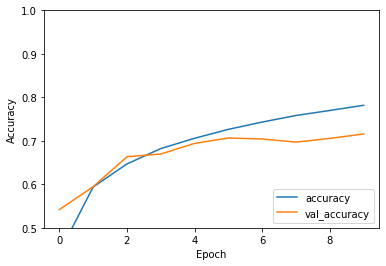

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

